# Chargement de la base

In [2]:
#Chargement de la base
from sklearn import datasets
iris = datasets.load_iris()

# Découverte du contenu de la base

L'attribut feature_names contient le nom des différents paramètres de nos données, il s'agit des longueurs et largeurs de pétales et sépales.

Les données descriptives (explictives) sont stcokées dans data
La liste des espèces connues, nos labels de classification, est contenue dans l'attribut target_names

En résumé, l'échantillon de fleurs propose plusieurs informations:

Les noms des données disponibles : feature_names

Les mesures réalisées sur l'échantillon de fleurs connues et déjà classées : data

Il s'agit de nos informations, des paramètres de nos vecteurs pour chaque fleur

Le nom de chaque espèce : target_names

Le classement de chaque enregistrement data dans son espèce: target

In [ ]:
print(type(iris)) # Ce n'est pas un DataFrame, mais une sorte de dictionnaire
print(dir(iris)) #les compostantes de la base
print(iris.feature_names) # Les noms des paramètres de nos donénes/enregistrements
print(iris.data[:5]) # aperçu des 5 premiers enregistrements
print(iris.target_names)# nos labels de classification

<class 'sklearn.utils.Bunch'>
['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
['setosa' 'versicolor' 'virginica']


# Observation des données d'apprentissage

Création d'une variable target pour un accès plus facile à cet attribut: les targets sont un tableau indiquant le numéro de l'espèce de chaque enregistrement

Avant de commencer, affichager le nombre d'exemplaires dans chaque classe et le type ainsi que les dimensions des données. 

In [ ]:
target = iris.target # Les labels associés à chaque enregistrement
target               # target[0] est le label de iris['data'][0]
for i in [0,1,2]:
    print("classe : %s, nb exemplaires: %s" % (i, len(target[ target == i]) ) )
data = iris.data # Pour un accès plus rapide
type(data), data.ndim, data.shape # tableau numpy de 2 dimensions de 150 enregistrements de 4 valeurs

NameError: ignored

# Visualisation des données

D'abord, visualiser à quoi ressemblent les données et si d'éventuelles relations se dessinent.

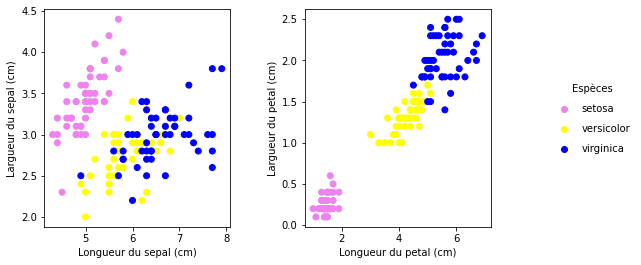

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

fig = plt.figure(figsize=(8, 4))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax1 = plt.subplot(1,2,1)

clist = ['violet', 'yellow', 'blue']
colors = [clist[c] for c in iris.target]

ax1.scatter(data[:, 0], data[:, 1], c=colors)
plt.xlabel('Longueur du sepal (cm)')
plt.ylabel('Largueur du sepal (cm)')

ax2 = plt.subplot(1,2,2)

ax2.scatter(data[:, 2], data[:, 3], color=colors)

plt.xlabel('Longueur du petal (cm)')
plt.ylabel('Largueur du petal (cm)')

# Légende
for ind, s in enumerate(iris.target_names):
    # on dessine de faux points, car la légende n'affiche que les points ayant un label
    plt.scatter([], [], label=s, color=clist[ind])

plt.legend(scatterpoints=1, frameon=False, labelspacing=1
           , bbox_to_anchor=(1.8, .5) , loc="center right", title='Espèces')
plt.plot();

# Préparation des données d'apprentissage et de test

Le module `model_selection` de Scikit-Learn propose des fonctions pour séparer le jeu de données du jeu de tests qui sont attentives aux proportions des classes dans les modèles.

La fonction `train_test_split` permet de décomposer le jeu de données en 2 groupes: les données pour l'apprentissage et les données pour les tests.

Le paramètre `train_size` indique la taille du jeu d'apprentissage qui sera utilisé: 50% des enregistrements pour notre cas.

In [ ]:
from sklearn.model_selection import train_test_split 
# split the data with 50% in each set
data_train, data_test, target_train, target_test = train_test_split(data, target
                                 , random_state=0
                                 , train_size=0.5)
print(data_train.shape)
print(data_test.shape)
print(data_test[:5])

(75, 4)
(75, 4)
[[5.8 2.8 5.1 2.4]
 [6.  2.2 4.  1. ]
 [5.5 4.2 1.4 0.2]
 [7.3 2.9 6.3 1.8]
 [5.  3.4 1.5 0.2]]


# Apprentissage
Nous pouvons  utiliser plusieurs algorithmes de classification
Nous proposons de commencer par la classification Naive Bayes qui suppose que chaque classe est construite à partir d'une distribution Gaussiènne alignée.
Elle n'impose pas de définir d'hyperparamètres et est très rapide.



*   Importer la méthode GaussianNB
*   Création du classifieur (clf)
*   Lancer l'apprentissage



In [ ]:
from sklearn.naive_bayes import GaussianNB 
clf = GaussianNB() # Création du classifieur
clf.fit(data_train, target_train) #appreltissage

GaussianNB(priors=None, var_smoothing=1e-09)

# Prédiction

Application du modèle de classification sur les données test.

In [ ]:
result1 = clf.predict(data_test)

# Qualité de la prédiction

Pour mesurer la qualité de la prédiction , Scikit-Learn propose des solutions adéquates comme la fonction `accuracy_score`qui calcule la précision du modèle de classification.

Scikit-Learn permet aussi de calculer la matrice de confusion.


In [ ]:
from sklearn.metrics import accuracy_score
print (accuracy_score(result1, target_test)) # précision du modèle
from sklearn.metrics import confusion_matrix 
conf = confusion_matrix(result1, target_test) #matrice de confusion du modèle
print(conf)


0.9466666666666667
[[21  0  0]
 [ 0 30  4]
 [ 0  0 20]]


Visualisation de la matrice de confusion

La bibliothèque `Seaborn` permet de  représenter la matrice de confusion avec le `Heatmap`

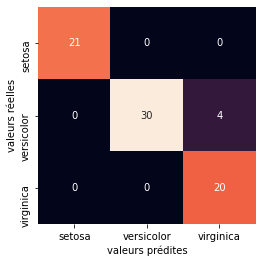

In [ ]:
import seaborn as sns
sns.heatmap(conf, square=True, annot=True, cbar=False
            , xticklabels=list(iris.target_names)
            , yticklabels=list(iris.target_names))
plt.xlabel('valeurs prédites')
plt.ylabel('valeurs réelles');

# Classification par la méthode des plus proches voisins:
Essayons le même traitement en remplaçant GaussianNB par KNN (K plus proches voisin).

La classe à utiliser est : 
```
from sklearn import neighbors
clf2 = neighbors.KNeighborsClassifier()
```

Voir le lien ci-dessous pour une aide sur l'utilisation de la classe.
https://scikit-learn.org/stable/modules/neighbors.html

Enregsiter les résultats pour une comparaison avec GaussianNB.

0.96
[[21  0  0]
 [ 0 29  2]
 [ 0  1 22]]


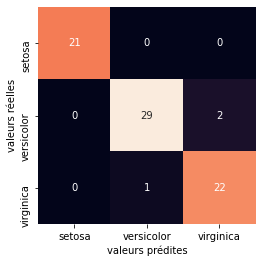

In [ ]:
from sklearn import neighbors  #importation du module neighbors
clf2 = neighbors.KNeighborsClassifier() #création d'un classifieur de type KNN
clf2.fit(data_train, target_train) #apprentissage

result2 = clf2.predict(data_test)
print (accuracy_score(result2, target_test)) # précision du modèle
conf = confusion_matrix(result2, target_test) #matrice de confusion du modèle
list_accuracy.append(accuracy_score(result2, target_test))
print(conf)

sns.heatmap(conf, square=True, annot=True, cbar=False
            , xticklabels=list(iris.target_names)
            , yticklabels=list(iris.target_names))

plt.xlabel('valeurs prédites')
plt.ylabel('valeurs réelles');

# Classification par la méthode des arbres de décision:
Essayons le même traitement en remplaçant KNN par les arbres de décision.

La classe à utiliser est : 
```
from sklearn import tree
clf3 = tree.DecisionTreeClassifier()
```

Voir le lien ci-dessous pour une aide sur l'utilisation de la classe.
https://scikit-learn.org/stable/modules/tree.html

Enregsiter les résultats pour une comparaison avec Les méthodes précédentes.

0.96
[[21  0  0]
 [ 0 29  2]
 [ 0  1 22]]


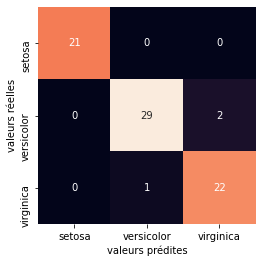

[Text(133.92000000000002, 195.696, 'X[3] <= 0.75\ngini = 0.659\nsamples = 75\nvalue = [29, 20, 26]'),
 Text(66.96000000000001, 152.208, 'gini = 0.0\nsamples = 29\nvalue = [29, 0, 0]'),
 Text(200.88000000000002, 152.208, 'X[2] <= 5.05\ngini = 0.491\nsamples = 46\nvalue = [0, 20, 26]'),
 Text(133.92000000000002, 108.72, 'X[3] <= 1.75\ngini = 0.165\nsamples = 22\nvalue = [0, 20, 2]'),
 Text(66.96000000000001, 65.232, 'gini = 0.0\nsamples = 19\nvalue = [0, 19, 0]'),
 Text(200.88000000000002, 65.232, 'X[1] <= 3.1\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(133.92000000000002, 21.744, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(267.84000000000003, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(267.84000000000003, 108.72, 'gini = 0.0\nsamples = 24\nvalue = [0, 0, 24]')]

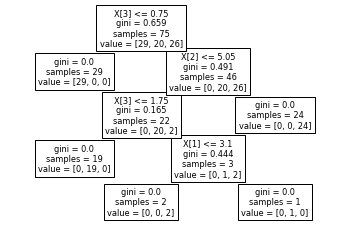

In [ ]:
from sklearn import tree #importation du module tree

clf3 = tree.DecisionTreeClassifier() #création d'un classifieur de type arbre de décision
clf3.fit(data_train, target_train) #apprentissage
result3 = clf3.predict(data_test) #prédiction sur les données test

print (accuracy_score(result3, target_test)) # précision du modèle

conf = confusion_matrix(result3, target_test) #matrice de confusion du modèle
print(conf)

sns.heatmap(conf, square=True, annot=True, cbar=False
            , xticklabels=list(iris.target_names)
            , yticklabels=list(iris.target_names))

plt.xlabel('valeurs prédites')
plt.ylabel('valeurs réelles');

plt.show()

plt.clf()

tree.plot_tree(clf3)


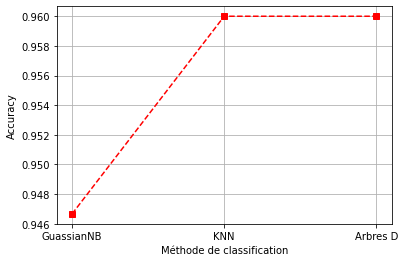

In [ ]:
#Regroupement des résultats pour affichage dans une courbe

list_m = ['GuassianNB', 'KNN', 'Arbres D']
list_x = [1, 2, 3]
#Sauvegarde des performances (accuracy) dans une liste
list_accuracy = []
list_accuracy.append(accuracy_score(result1, target_test))
list_accuracy.append(accuracy_score(result2, target_test))
list_accuracy.append(accuracy_score(result3, target_test))

plt.plot(list_x, list_accuracy, 'rs--')
plt.xticks(list_x, list_m)
plt.grid()
plt.xlabel("Méthode de classification")
plt.ylabel("Accuracy")

plt.show()